In [2]:
import pandas as pd
df = pd.read_csv('Discord.csv')

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


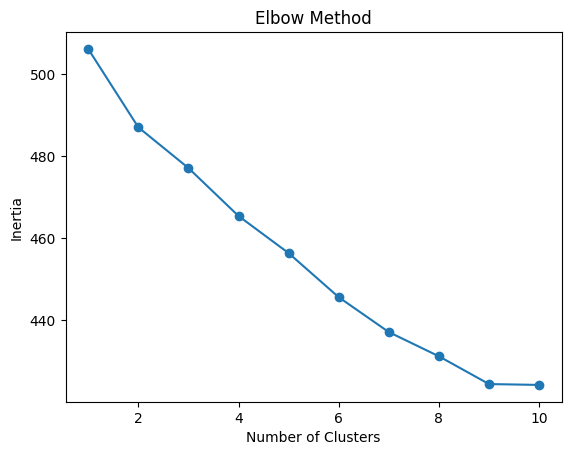

Optimal number of clusters: 9
Cluster 0: Main Keywords: discord, ps5, xbox, account, on
Cluster 1: Main Keywords: server, discord, bots, meaning, music
Cluster 2: Main Keywords: nitro, free, discord, cancel, how
Cluster 3: Main Keywords: app, discord, xbox, store, ea
Cluster 4: Main Keywords: emoji, discord, auto, copy, off
Cluster 5: Main Keywords: pfp, kitty, hello, girl, meaning
Cluster 6: Main Keywords: steam, deck, games, sale, replay
Cluster 7: Main Keywords: bot, discord, music, carl, ai
Cluster 8: Main Keywords: to, how, discord, ps5, on
Cluster 7: discord bot, bot, discord music bot, music bot, uzox bot, uzox discord bot, jockie music bot, discord music bot that plays youtube, music bot discord 2022, aiode discord bot, discord bot music, mee6 bot discord, mee6 bot, discord bot commands, youtube bot discord, discord carl bot, carl bot, carl bot discord, make a discord bot, discord roles bot, dyno discord bot, dyno bot, discord role bot, music bot for discord, python discord bot

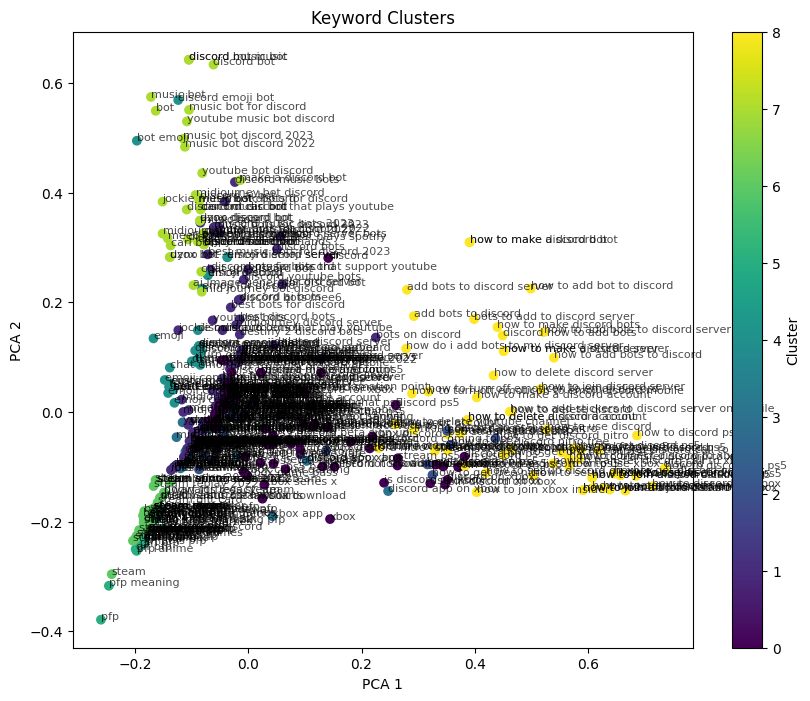

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



# Provided list of keywords
# keywords = [
#     "ai voice song cover",
#     "poe ai",
#     "rvc ai voice",
#     "11 labs ai voice",
#     "free headshot generator",
#     "remini baby ai generator",
#     "ai headshot generator",
#     "character ai bypass",
#     "remini",
#     "free ai headshot generator",
#     "unstable diffusion",
#     "character ai nsfw filter bypass",
#     "midjourney promo code",
#     "beta character ai reddit",
#     "stability ai",
#     "bypass character ai filter",
#     "character ai reddit",
#     "bard dnd 5e",
#     "voice ai voice changer",
#     "beta character.ai",
#     "best ai image generators",
#     "my character ai",
#     "what is stable diffusion ai",
#     "fotor ai image generator"
# ]

keywords = list(df["Month"])

# Preprocess and tokenize the keywords
preprocessed_keywords = [keyword.lower().split() for keyword in keywords]

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform([' '.join(keyword) for keyword in preprocessed_keywords])

# Elbow Method to find optimal number of clusters
inertia_values = []
max_clusters = 10  # Maximum number of clusters to consider

for num_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(tfidf_matrix)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, max_clusters + 1), inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Determine optimal number of clusters based on Elbow Method
optimal_num_clusters = None
elbow_point = None

# Find the "elbow point" where the rate of decrease slows down significantly
for i in range(1, max_clusters - 1):
    relative_change = (inertia_values[i] - inertia_values[i + 1]) / inertia_values[i]
    if elbow_point is None or relative_change < elbow_point:
        elbow_point = relative_change
        optimal_num_clusters = i + 1

print(f"Optimal number of clusters: {optimal_num_clusters}")

# K-Means clustering with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

# Dimensionality reduction for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

# Print clustered keywords
clustered_keywords = {}
for cluster_id, keyword in zip(clusters, keywords):
    if cluster_id not in clustered_keywords:
        clustered_keywords[cluster_id] = []
    clustered_keywords[cluster_id].append(keyword)

# Calculate cluster centroids and find main keywords
cluster_centroids = kmeans.cluster_centers_
feature_names = tfidf_vectorizer.get_feature_names_out()

for cluster_id, centroid in enumerate(cluster_centroids):
    main_keywords_indices = centroid.argsort()[::-1][:5]  # Choose the top 5 terms
    main_keywords = [feature_names[i] for i in main_keywords_indices]
    print(f"Cluster {cluster_id}: Main Keywords: {', '.join(main_keywords)}")

# Print keywords in each cluster
for cluster_id, keywords_in_cluster in clustered_keywords.items():
    print(f"Cluster {cluster_id}: {', '.join(keywords_in_cluster)}")

# Plotting clusters using matplotlib
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')

# Annotate points with keyword labels
for i, keyword in enumerate(keywords):
    plt.annotate(keyword, (pca_result[i, 0], pca_result[i, 1]), fontsize=8, alpha=0.7)

plt.title('Keyword Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()



In [27]:
list1 = []
for cluster_id, keywords_in_cluster in clustered_keywords.items():
        for i in keywords_in_cluster:
                list1.append(i)

df2 = pd.DataFrame(list1)
# print(list1[:2])
# print(df2.head())
df2.to_csv("clustered.csv")